In [1]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import category_encoders as ce
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import classification_report
import seaborn as sns

In [2]:
df = pd.read_csv('Car_Safety.csv')
df

,Buying_Price,Maintainence_Cost,No_of_doors,No_of_people,Lug_boot,Safety,Decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [3]:
df.shape

(1728, 7)

In [4]:
df.describe()

,Buying_Price,Maintainence_Cost,No_of_doors,No_of_people,Lug_boot,Safety,Decision
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Buying_Price       1728 non-null   object
 1   Maintainence_Cost  1728 non-null   object
 2   No_of_doors        1728 non-null   object
 3   No_of_people       1728 non-null   object
 4   Lug_boot           1728 non-null   object
 5   Safety             1728 non-null   object
 6   Decision           1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


/var/folders/nk/tzs157bs2zl7cfxbfgzc6n_h0000gn/T/ipykernel_3651/3058443483.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='viridis')


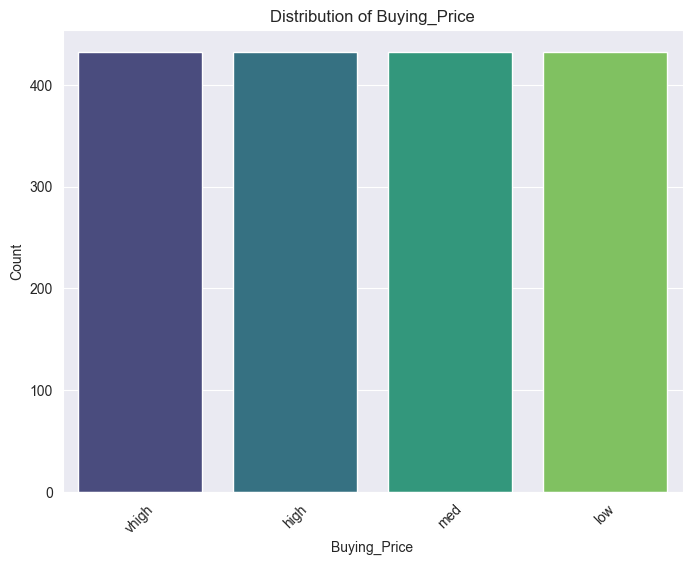

/var/folders/nk/tzs157bs2zl7cfxbfgzc6n_h0000gn/T/ipykernel_3651/3058443483.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='viridis')


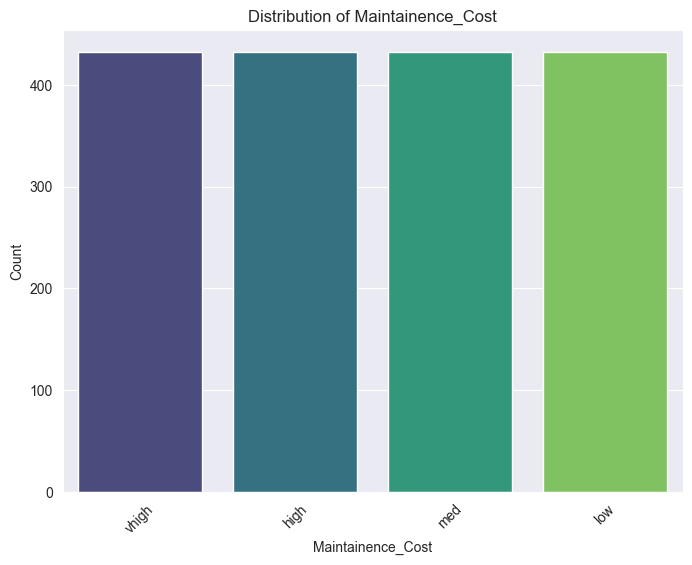

/var/folders/nk/tzs157bs2zl7cfxbfgzc6n_h0000gn/T/ipykernel_3651/3058443483.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='viridis')


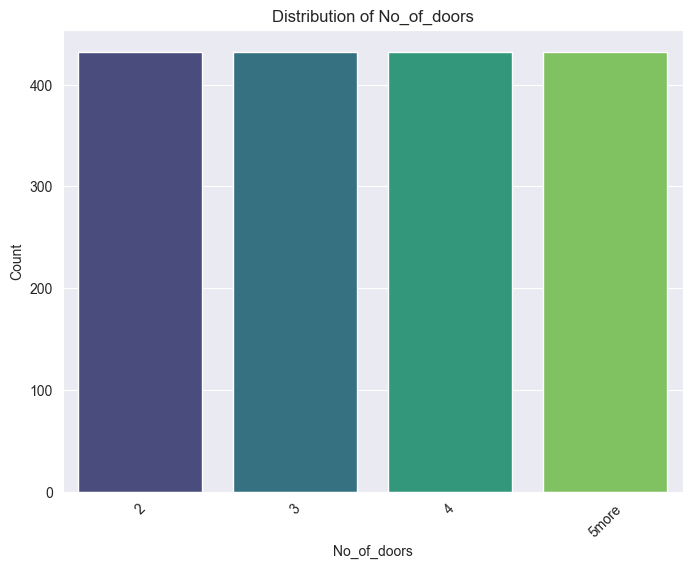

/var/folders/nk/tzs157bs2zl7cfxbfgzc6n_h0000gn/T/ipykernel_3651/3058443483.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='viridis')


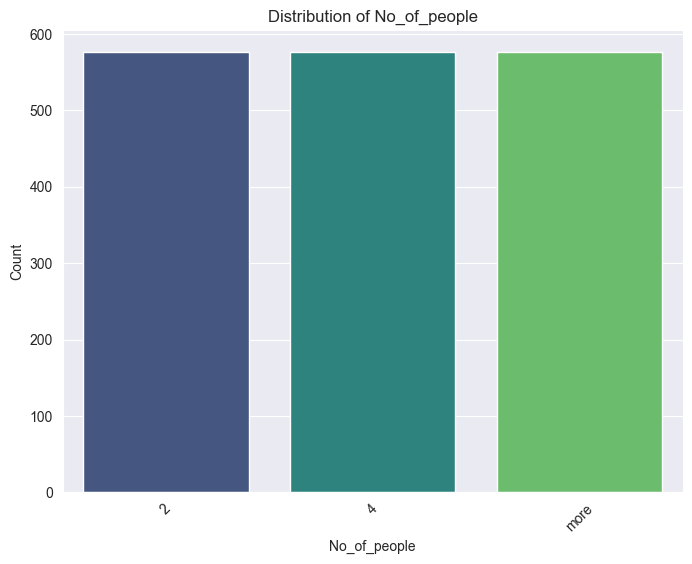

/var/folders/nk/tzs157bs2zl7cfxbfgzc6n_h0000gn/T/ipykernel_3651/3058443483.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='viridis')


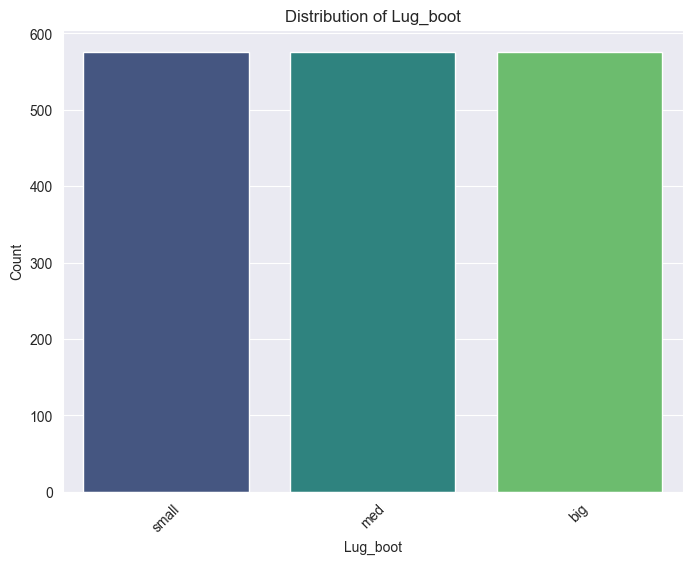

/var/folders/nk/tzs157bs2zl7cfxbfgzc6n_h0000gn/T/ipykernel_3651/3058443483.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='viridis')


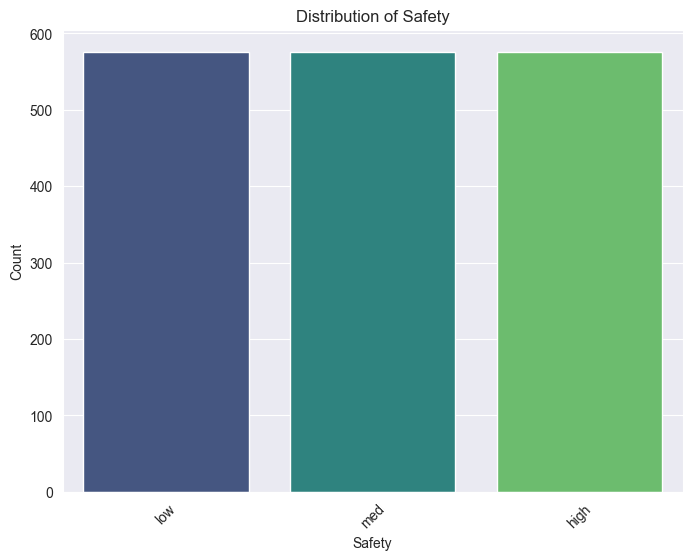

/var/folders/nk/tzs157bs2zl7cfxbfgzc6n_h0000gn/T/ipykernel_3651/3058443483.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='viridis')


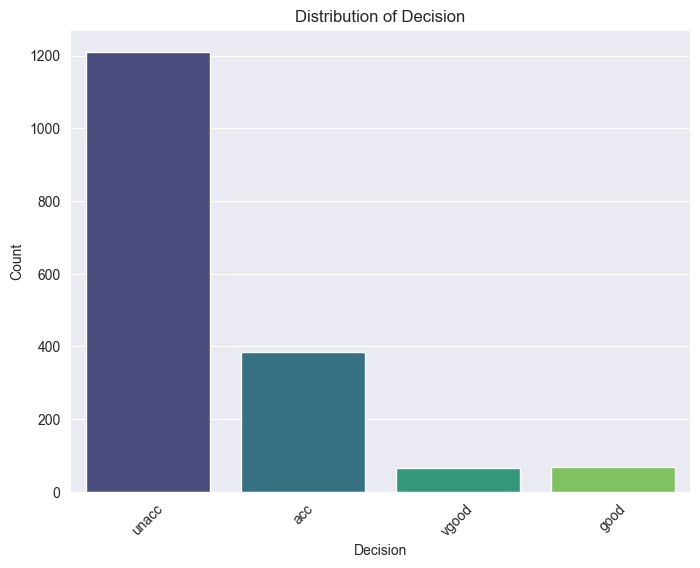

In [6]:
for column in df.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=df, palette='viridis')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()

In [7]:
X = df.drop(['Decision'], axis=1)
y = df['Decision']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [9]:
X_train.shape, X_test.shape

((1382, 6), (346, 6))

In [10]:
encoder = ce.OrdinalEncoder(cols=['Buying_Price' ,'Maintainence_Cost'  ,'No_of_doors' ,'No_of_people','Lug_boot' ,'Safety'])
X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [11]:
X_train.head()

,Buying_Price,Maintainence_Cost,No_of_doors,No_of_people,Lug_boot,Safety
107,1,1,1,1,1,1
901,2,1,2,2,2,2
1709,3,2,1,3,1,1
706,4,3,3,3,3,2
678,4,3,2,3,3,3


In [12]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

clf = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Estimator: DecisionTreeClassifier(max_depth=10, random_state=42)


In [13]:
y_pred = grid_search.predict(X_test)

In [14]:
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with criterion gini index: 0.9653


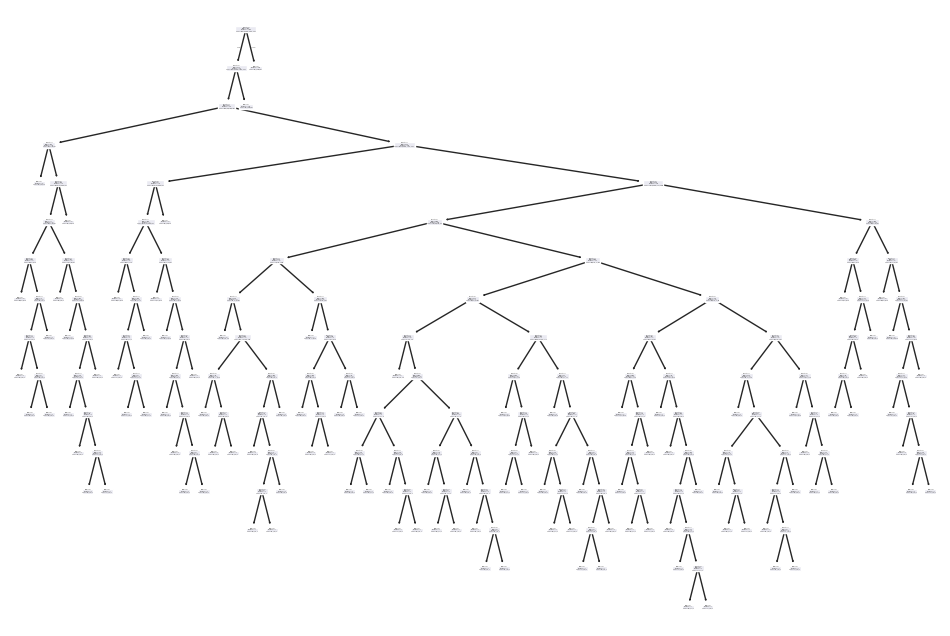

In [15]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf.fit(X_train, y_train))
plt.show()

In [16]:
cm = metrics.confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 80   2   1   0]
 [  1   9   0   1]
 [  0   0 235   0]
 [  4   3   0  10]]


In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.94      0.96      0.95        83
        good       0.64      0.82      0.72        11
       unacc       1.00      1.00      1.00       235
       vgood       0.91      0.59      0.71        17

    accuracy                           0.97       346
   macro avg       0.87      0.84      0.85       346
weighted avg       0.97      0.97      0.96       346

